In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('house.csv')

In [3]:
df

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price
0,1,26.184098,1286.68,204.003817,22,67,96004.804557
1,1,34.866901,1855.25,186.980360,8,30,92473.722568
2,1,36.980709,692.09,111.224999,24,24,98112.519942
3,1,17.445723,1399.49,237.998760,1,66,92118.326874
4,1,52.587646,84.65,100.996400,20,3,98976.653176
...,...,...,...,...,...,...,...
4303,9,175.166533,1299.71,217.739012,2,5,102707.356224
4304,6,215.352151,1346.36,77.724676,14,5,99695.064992
4305,5,299.563972,1585.37,235.537881,3,5,93803.715617
4306,1,29.193907,1896.23,147.223827,4,2,92914.729126


In [4]:
cor = df.corr()
cor

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price
bedroom_count,1.000000,0.753441,-0.014428,0.022111,-0.534736,-0.056951,0.552405
net_sqm,0.753441,1.000000,-0.008848,0.031006,-0.409225,-0.050120,0.681987
center_distance,-0.014428,-0.008848,1.000000,0.581200,0.022840,0.011684,-0.418161
metro_distance,0.022111,0.031006,0.581200,1.000000,0.003137,0.011848,-0.146373
floor,-0.534736,-0.409225,0.022840,0.003137,1.000000,0.022045,-0.136713
age,-0.056951,-0.050120,0.011684,0.011848,0.022045,1.000000,-0.225119
price,0.552405,0.681987,-0.418161,-0.146373,-0.136713,-0.225119,1.000000


<AxesSubplot:>

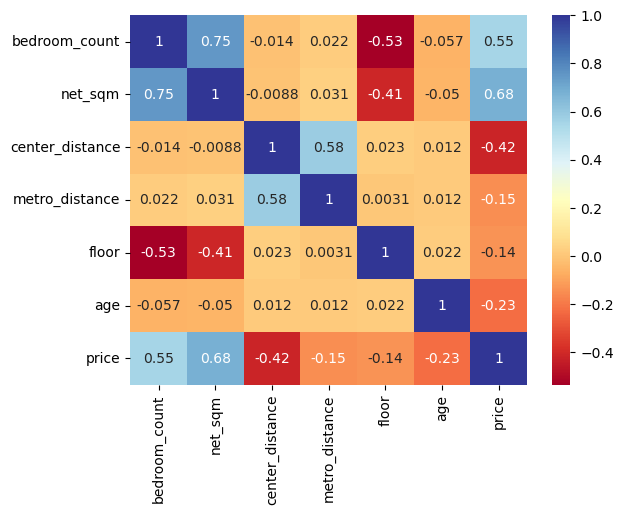

In [5]:
import seaborn as sns
sns.heatmap(cor, cmap='RdYlBu',annot=True)

In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df.drop('price',axis=1)
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = vif

print(vif_data)

          Variable       VIF
0    bedroom_count  7.175353
1          net_sqm  5.896119
2  center_distance  6.724060
3   metro_distance  5.946622
4            floor  2.349896
5              age  3.276097


In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
sc = StandardScaler()
col = ['net_sqm', 'center_distance', 'metro_distance', 'price']
df[col] = sc.fit_transform(df[col])

In [9]:
x = df.drop('price', axis=1)
y = df['price']

In [10]:
df

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price
0,1,-0.971700,0.353231,1.618906,22,67,0.077464
1,1,-0.880741,1.377200,1.338656,8,30,-0.823468
2,1,-0.858597,-0.717598,0.091526,24,24,0.615233
3,1,-1.063241,0.556397,2.178551,1,66,-0.914144
4,1,-0.695103,-1.811569,-0.076863,20,3,0.835710
...,...,...,...,...,...,...,...
4303,9,0.589000,0.376698,1.845023,2,5,1.787573
4304,6,1.009974,0.460712,-0.459976,14,5,1.019008
4305,5,1.892154,0.891158,2.138038,3,5,-0.484129
4306,1,-0.940170,1.451003,0.684160,4,2,-0.710948


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7, random_state=42)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
model = LinearRegression(n_jobs=10)

In [15]:
model.fit(x_train,y_train)

LinearRegression(n_jobs=10)

In [16]:
y_preds = model.predict(x_test)

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_preds)
print("Mean Absolute Error:", mae)

mse = mean_squared_error(y_test, y_preds)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

r2 = r2_score(y_test, y_preds)
print("R-squared (R2) Score:", r2)

Mean Absolute Error: 0.37879143870626325
Mean Squared Error: 0.269700720306244
Root Mean Squared Error: 0.5193271804038798
R-squared (R2) Score: 0.7306045234946181
